# Resposta ao impulso de tempo contínuo

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl
  from IPython.display import clear_output
  !sudo apt update
  !sudo apt install libcairo2-dev ffmpeg \
       texlive texlive-latex-extra texlive-fonts-extra \
       texlive-latex-recommended texlive-science \
       tipa libpango1.0-dev
  !pip install manim
  !pip install IPython --upgrade
  clear_output()
  # Se estiver no Colab, reiniciar o ambiente após executar esta célula

In [ ]:
import sympy as sym
from manim import *
from manim.utils.color import Colors
config.media_width = "100%"
config.verbosity = "WARNING"

ImportError: /home/rnwatanabe/miniconda3/lib/python3.10/site-packages/cairo/_cairo.cpython-310-x86_64-linux-gnu.so: undefined symbol: cairo_tee_surface_index

## Definição

A **resposta ao impulso** (às vezes também chamada de **resposta impulsiva**) de um sistema contínuo é o sinal de saída de um sistema quando um impulso $\delta(t)$ é usado como sinal de entrada do sistema e inicialmente o sistema está em repouso (a saída $y(t)$ e todas as suas derivadas iguais a zero). A resposta ao impulso é normalmente representada pela letra $h(t)$.

<img src=https://github.com/csgallis/SistemasESinais/blob/master/Imagens/diagimpulsocont.png?raw=1 width="500">

O sinal impulso é um sinal que ocorre em apenas um instante que tem amplitude infinita. É como se desse uma "pancada" no sistema ou o sistema fosse atingido por um raio. É algo muito forte que acontece por apenas um instante. Após o instante em que o impulso acontece ($t=0$) a entrada fica zero novamente.

Mas nesse único instante, o sistema recebe uma quantidade de energia que muda toda a configuração do sistema, mudando assim os valores do sinal de saída e de suas derivadas. Desta forma é como se as condições iniciais do sistema mudassem devido ao impulso.

Portanto, para encontrar a resposta ao impulso de um sistema contínuo, linear e invariante no tempo, com a seguinte forma geral de equação diferencial:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = b_N\frac{d^Nx}{dt^N} +...+b_2\frac{d^2x}{dt^2}+b_1\frac{dx}{dt} + b_0x(t) $$

basta encontrar a resposta de entrada nula do sistema considerando as novas condições iniciais devido ao impulso. Aqui esse sinal terá o símbolo $w(t)$ (é um sinal intermediário no cálculo da resposta ao impulso, sem nenhum significado físico). Essas condições iniciais são:

$$\frac{d^{N-1}w}{dt^{N-1}}(0) = 1, \frac{d^{N-2}w}{dt^{N-2}}(0) = 0, ..., w(0) = 0$$

Uma vez encontrada esse sinal $w(t)$, para encontrar a resposta ao impulso basta fazer:

$$h(t)= \left(b_N\frac{d^Nw}{dt^N} +...+b_2\frac{d^2w}{dt^2}+b_1\frac{dw}{dt} + b_0w(t)\right)u(t) $$


Essa expressão de $h(t)$ é válida para $t>0$. Em $t=0$, se $b_N\neq 0$ aparecerá um impulso com área $b_N$, somado a expresão anterior.

$$h(t)= b_N\delta(t) + \left(b_N\frac{d^Nw}{dt^N} +...+b_2\frac{d^2w}{dt^2}+b_1\frac{dw}{dt} + b_0w(t)\right)u(t) $$


A demonstração desse método está no vídeo abaixo.

In [ ]:
%%manim -qm ImpulseObtain

def step(x):
    if x >=0:
        return 1
    else:
        return 0

def zeros(x):
    return 0


class ImpulseObtain(Scene):
    def construct(self):
        text1=MathTex(
            "\\frac{d^Ny}{dt^N} + a_{N-1}\\frac{d^{N-1}y}{dt^{N-1}}+a_{N-2}\\frac{d^{N-2}y}{dt^{N-2}}+...+a_0y(t)",
            "=",
            "b_M\\frac{d^Mx}{dt^M} +...+b_2\\frac{d^2x}{dt^2}+b_1\\frac{dx}{dt} + b_0x(t) ",
        font_size=35)
        self.play(Write(text1))
        text2=MathTex(
            "\\frac{d^Ny}{dt^N} + a_{N-1}\\frac{d^{N-1}y}{dt^{N-1}}+a_{N-2}\\frac{d^{N-2}y}{dt^{N-2}}+...+a_0y(t)",
            "=",
            "w(t)",
        font_size=35)

        text3=MathTex(
            "w(t)",
            "=",
            "b_M\\frac{d^Mx}{dt^M} +...+b_2\\frac{d^2x}{dt^2}+b_1\\frac{dx}{dt} + b_0x(t) ",
        font_size=35).move_to(DOWN)
        text5=MathTex(
            "\\frac{d^Nw}{dt^N} + a_{N-1}\\frac{d^{N-1}w}{dt^{N-1}}+a_{N-2}\\frac{d^{N-2}w}{dt^{N-2}}+...+a_0w(t)",
            "=",
            "\\delta(t)",
        font_size=35).move_to((0,3,0))

        text6=MathTex(
            "h(t)",
            "=",
            "b_M\\frac{d^Mw}{dt^M} +...+b_2\\frac{d^2w}{dt^2}+b_1\\frac{dw}{dt} + b_0w(t) ",
        font_size=35).move_to((0,2,0))
        brace1 = Brace(text1[2])
        brace1text = brace1.get_tex("w(t)")
        S1text = MathTex('S_1:  ').move_to((-5,0,0))
        S2text = MathTex('S_2:  ').move_to((-5,-1,0))
        # framebox2 = SurroundingRectangle(text[2], buff = .1)
        # self.play(
        #     Create(framebox1),
        # )
        self.wait()
        self.add(brace1)
        self.wait()
        self.add(brace1text)
        self.wait()
        self.remove(brace1, brace1text)
        self.play(
            ReplacementTransform(text1,text2),
            Write(text3)
        )
        self.add(S1text, S2text)
        self.wait(2)
        S1 = MathTex('S1').move_to((-5,0,0))
        S2 = MathTex('S2').move_to((-5,-1,0))
        self.play(S1.animate.move_to((3,-2,0)),
                  S2.animate.move_to((-3,-2,0)),
                  S1text.animate.move_to((-5,3,0)),
                  S2text.animate.move_to((-5,2,0)),
                  text2.animate.move_to((0,3,0)),
                  text3.animate.move_to((0,2,0)))
        rec1 = SurroundingRectangle(S1, buff=0.7)
        rec2 = SurroundingRectangle(S2, buff=0.7)
        line1 = Arrow([-2.05,-2,0], [2,-2,0], buff=0)
        rec3 = SurroundingRectangle(Group(rec1, rec2, line1), buff=0.5)
        line2 = Arrow([-6,-2,0], [-4,-2,0], buff=0)
        line3 = Arrow([4,-2,0], [6,-2,0], buff=0)
        x = MathTex('x(t)').move_to((-5,-1.5,0))
        y = MathTex('y(t)').move_to((5,-1.5,0))
        w = MathTex('w(t)').move_to((0,-1.5,0))
        delta = MathTex('\\delta(t)').move_to((-5,-1.5,0))
        h = MathTex('h(t)').move_to((5,-1.5,0))
        self.add(rec1, rec2, line1, line2, line3, x, y, w, rec3)
        self.wait(2)
        self.play(ReplacementTransform(x, delta),
                  ReplacementTransform(y, h))
        self.wait(2)
        text4 = Text('SLIT').move_to((0,0,0))
        self.add(text4)
        self.play(S1.animate.move_to((-3,-2,0)),
                  S2.animate.move_to((3,-2,0)),
                  ReplacementTransform(text2, text5),
                  ReplacementTransform(text3, text6)
                  )
        self.wait(2)
        sis = Group(line1, line2, line3, S1, S2, rec1, rec2, rec3, delta, h, w)
        S2group = Group(S2text, text6)

        self.remove(text4)
        self.play(sis.animate.scale(0.5), S2group.animate.scale(0.7))
        self.play(sis.animate.move_to((-4,-3,0)),
                  S2group.animate.move_to((2.5, -3,0)))


        ax = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((-6, 1.5,0))
        line4 = Arrow([-6.7,1.1,0], [-6.7,2,0], buff=0, color=BLUE)

        ax2 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((-3, 1.5,0))
        graph2 = ax2.plot(lambda x: step(x), color=BLUE, x_range=[-1, 0.5, 0.01],
                        use_smoothing=False)

        ax3 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((0, 1.5,0))
        graph3 = ax3.plot(lambda x: zeros(x), color=BLUE, x_range=[-1, 0.5, 0.01],
                            use_smoothing=False)

        ax4 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((2.7, 1.5,0))
        graph4 = ax4.plot(lambda x: zeros(x), color=BLUE, x_range=[-1, 0.5, 0.01],
                        use_smoothing=False)

        ax5 = Axes(x_range=[-1, 4], y_range=[-1, 5], tips=False).scale(0.2).move_to((6, 1.5,0))
        line5 = Arrow([5.3,1.1,0], [5.3,2,0], buff=0, color=BLUE)

        text6 = MathTex('+').move_to((-4.8,1.5,0))
        text7 = MathTex('+').move_to((-1.8,1.5,0))
        text8 = MathTex('...').move_to((1.2,1.5,0))
        text9 = MathTex('=').move_to((4.2,1.5,0))
        self.add(ax, line4, ax2, graph2, ax3, graph3,
                 ax4, graph4, ax5, line5,
                 text6, text7, text8, text9)
        self.wait(2)
        text10 = MathTex('\\frac{d^Nw}{dt^N}(0) = \\delta(0)').next_to(ax, DOWN).scale(0.7)
        text11 = MathTex('\\frac{d^{N-1}w}{dt^{N-1}}(0) = 1').next_to(ax2, DOWN).scale(0.7)
        text12 = MathTex('\\frac{d^{N-2}w}{dt^{N-2}}(0) = 0').next_to(ax3, DOWN).scale(0.7)
        text13 = MathTex('w(0) = 0').next_to(ax4, DOWN).scale(0.7)
        self.add(text10, text11, text12, text13)
        winit = Group(text10, text11, text12, text13)
        self.wait(5)
        self.remove(ax, line4, ax2, graph2, ax3, graph3,
                    ax4, graph4, ax5, line5, text6,
                    text7, text8, text9)
        text13 =  MathTex('\\frac{d^Nw}{dt^N}(0) = \\delta(0), ', '\\frac{d^{N-1}w}{dt^{N-1}}(0) = 1, ',
                          '\\frac{d^{N-2}w}{dt^{N-2}}(0) = 0, ','...', 'w(0) = 0').scale(0.6).next_to(text5, DOWN)
        self.play(ReplacementTransform(winit, text13))
        self.wait(3)
        text14 = MathTex('w(t) = y_{zi}(t), \\text{ com } ', '\\frac{d^{N-1}w}{dt^{N-1}}(0) = 1, ',
                          '\\frac{d^{N-2}w}{dt^{N-2}}(0) = 0, ','...', 'w(0) = 0').scale(0.6).next_to(text5, DOWN)
        self.play(ReplacementTransform(text13, text14))
        self.wait(2)
        S1group = Group(S1text, text5)
        self.play(S2group.animate.scale(1/0.7), S1group.animate.scale(0.7))
        self.play(S2group.animate.move_to((-2, 3,0)),
                  S1group.animate.move_to((2.5, -3, 0)))

        self.wait(2)
        text15=MathTex(
            "h(t)",
            "=",
            "b_M\\frac{d^Mw}{dt^M} +...+b_2\\frac{d^2w}{dt^2}+b_1\\frac{dw}{dt} + b_0w(t) ",
        font_size=35).move_to((-1.5,3,0))
        self.remove(text14)
        self.play(ReplacementTransform(S2group, text15))
        self.wait(5)






---

### Exemplo 1:

Vamos encontrar a resposta ao impulso para o sistema com a equação diferencial abaixo:

$\frac{dy}{dt} - 0.5y(t) = x(t)$

A raiz do polinômio característico da equação diferencial é $\lambda_1=0.5$. Então $w(t)$ é:

$w(t)=A_1e^{\lambda t}$

Considerando a condição inicial $w(0) = 1$.

$w(t) = e^{0.5 t}$

Portanto, a resposta ao impulso desse sistema é:

$h(t) = e^{0.5 t}u(t)$

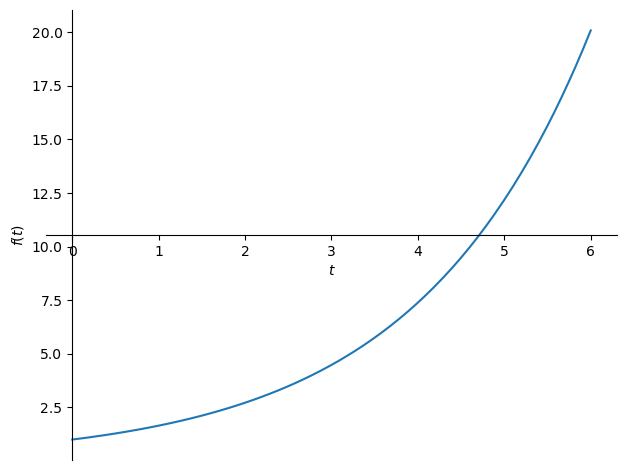

In [ ]:
t = sym.symbols('t')
sym.plot(sym.exp(0.5*t), (t,0, 6))

---

---

### Exemplo 2

Vamos agora obter uma expressão da resposta ao impulso da seguinte equação diferencial:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

As raízes do polinômio característico da equação são:

$\lambda_1 = \frac{-3 + \sqrt{9+16}}{2} = 1$ e $\lambda_2 = \frac{-3 - \sqrt{9+16}}{2} = -4$

O sinal $w(t)$ é:

$w(t) = A_1e^{t} + A_2e^{-4t}$, com $w(0) = 0$ e $\frac{dw}{dt}(0) = 1$.

Então:

$w(t) = 0.2e^t-0.2e^{-4t}$

Usando os coeficientes que multiplicam $x(t)$ e suas derivadas, temos:

$$h(t) = (3w(t) + \frac{dw}{dt})u(t) = (0.6e^t-0.6e^{-4t} + 0.2e^t +0.8e^{-4t})u(t) = (0.8e^t+0.2e^{-4t})u(t)$$

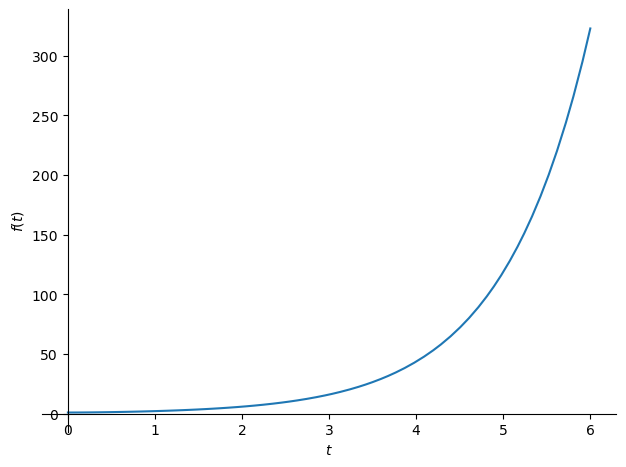

In [ ]:
t = sym.symbols('t')
sym.plot(0.8*sym.exp(t) + 0.2*sym.exp(-4*t), (t,0, 6))

---

---

### Exemplo 3

Vamos encontrar a resposta ao impulso de um sistema com a seguinte equação diferencial.

$$\frac{d^2y}{dt^2} = -4\frac{dy}{dt} - 4y(t) + 3x(t)$$

O polinômio característico é:

$\lambda^2 + 4\lambda + 4 = 0$

As raízes da equação são iguais e iguais a -2. Então, o sinal $w(t)$ é:

$w(t) = c_1e^{-2t} + c_2te^{-2t}$, com $w(0) = 0$ e $\frac{dw}{dt}(0) = 1$.

Então,

$$w(t) = te^{-2t}$$

Portanto , a resposta ao impulso é:

$$h(t) = 3te^{-2t}u(t)$$

O gráfico da resposta ao impulso está abaixo:



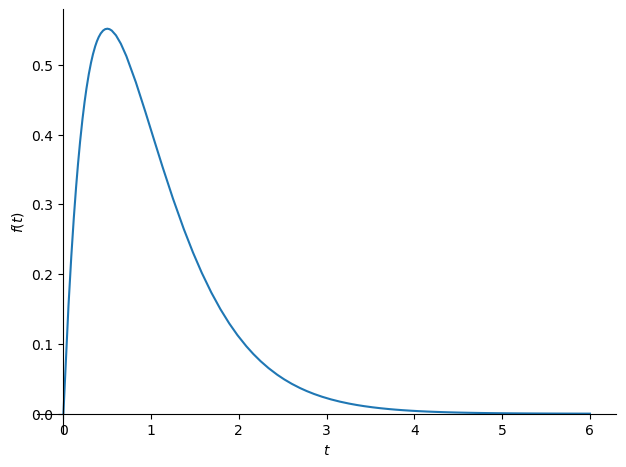

In [ ]:
t = sym.symbols('t')
sym.plot(3*sym.exp(-2*t)*t, (t,0, 6))

---

---

### Exemplo 4

Considere um sistema com a seguinte equação diferencial:

$$\frac{d^2y}{dt^2} = -2\frac{dy}{dt} - 2y(t) + x(t) + 2\frac{dx}{dt}$$

Para encontrar a resposta ao impulso desse sistema, calculamos as raízes do seu polinômio característico.

$\lambda_1 = \frac{-2 + \sqrt{4-8}}{2} = -1+j$ e $\lambda_2 = \frac{-2 - \sqrt{4-8}}{2} = -1-j$

Como as raízes são complexas, o sinal $w(t)$ terá a forma:

$w(t) = Ae^{-t}\cos(t+\theta)$, com $w(0) = 0$ e $\frac{dw}{dt}(0) = 1$.

Usando os valores iniciais, temos:

$w(t) = e^{-t}\cos\left(t-\frac{\pi}{2}\right)$

Portanto, a resposta ao impulso é:

$$h(t) = w(t) + 2\frac{dw}{dt} = e^{-t}\cos\left(t-\frac{\pi}{2}\right) - 2e^{-t}\cos\left(t-\frac{\pi}{2}\right) - 2e^{-t}\mathrm{sen}\left(t-\frac{\pi}{2}\right) = - e^{-t}\cos\left(t-\frac{\pi}{2}\right) - 2e^{-t}\mathrm{sen}\left(t-\frac{\pi}{2}\right)$$

O gráfico está mostrado abaixo:

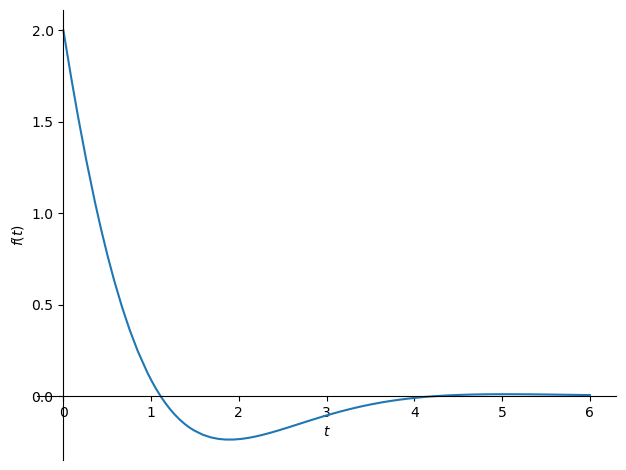

In [ ]:
t = sym.symbols('t')
sym.plot(-sym.exp(-t)*(sym.cos(t-sym.pi/2)+2*sym.sin(t-sym.pi/2)), (t,0, 6));


---

## Exercícios

**1)** Encontre a resposta ao impulso dos sistemas descritos pelas seguintes equações diferenciais e condições iniciais.

a) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-6y(t) + \frac{dx}{dt} + x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1$

b) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-4y(t)  + x(t)$, com $y(0) = 3, \frac{dy}{dt}(0) = -4$

c) $\frac{d^2y}{dt^2} = -\frac{dy}{dt} + \frac{dx}{dt} + x(t)$, com $y(0) = 1, \frac{dy}{dt}(0) = 1$

d) $\frac{d^2y}{dt^2} = -4y(t) + x(t)$, com $y(0) = 0, \frac{dy}{dt}(0) = 6$

e) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-13y(t) + 4\frac{dx}{dt} + 2x(t)$, com $y(0) = 1, \frac{dy}{dt}(0) = 9.9$

f) $\frac{d^3y}{dt^3} = -1\frac{d2y}{dt^2} + 2\frac{d^2x}{dt^2} + 3x(t)$, com $y(0) = 2, \frac{dy}{dt}(0) = 1, \frac{d2y}{dt^2}(0) = 0$

**2)** Considere o circuito elétrico da figura abaixo:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/RC_Series_Filter_%28with_V%26I_Labels%29.svg/1920px-RC_Series_Filter_%28with_V%26I_Labels%29.svg.png width="400">

Considere que o sinal de entrada do sistema é a tensão do gerador $x(t) = V_{in}$ e o sinal de saída é a tensão no resistor $y(t)=V_R$. Pede-se:

a) A equação diferencial que descreve o comportamento desse sistema (lembre-se que $I=C\frac{dV_c}{dt}$, $I = \frac{V_r}{R}$ e $V_{in} = V_c + V_r$).

b) A resposta ao impulso desse sistema.

**3)** Quais destas respostas ao impulso são de sistemas causais. Todos os sistemas são lineares e invariantes no tempo:

a) $h_1(t) = e^{-2|t|}$

b) $h_2(t) = (1-|t|)[u(t+2)-u(t-2)]$

c) $h_3(t) = e^{3t}u(-t)$

d) $h_4(t) = e^{3t}u(t)$

e) $h_5(t) = \cos(3t)u(t)$

f) $h_6(t) = \frac{t}{t+1}u(t)$

**4)** Encontre a resposta ao impulso dos sistemas descritos pelas seguintes equações diferenciais:

a) $\frac{d^4 y}{dt^4} = -y(t) + x(t)$, com  com $y(0)=1$, $\frac{dy}{dt}(0) = 1 $, $\frac{d^2y}{dt^2}(0) = 0$, $\frac{d^3y}{dt^3}(0) = -1 $

b) $\frac{d^3 y}{dt^3} = -y(t) + x(t) + \frac{dx}{dt}$, com  com $y(0)=1$, $\frac{dy}{dt}(0) = 1 $, $\frac{d^2y}{dt^2}(0) = 0$

c) $\frac{d^4 y}{dt^4} = -\frac{1}{16}y(t) + x(t)$, com  com $y(0)=1$, $\frac{dy}{dt}(0) = 1 $, $\frac{d^2y}{dt^2}(0) = 0$, $\frac{d^3y}{dt^3}(0) = -1 $


## Referências

- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios

**3)** Resolvido por Catherine

**a) $h_1(t) = e^{-2|t|}$**

Não é causal, pois não é nula para tempos anteriores a zero $t < 0$

**b) $(h_2(t) = (1-|t|)[u(t+2)-u(t-2)$**

Para verificar a causalidade, vamos analisar os intervalos de $t$ em que $h_2(t)$ é diferente de zero:
- Para $t < -2$: $h_2(t) = (1-|t|)[0-0] = 0$
- Para $-2 \leq t < -1$: $h_2(t) = (1-|t|)[0-1] = t-1$
- Para $-1 \leq t < 1$: $h_2(t) = (1-|t|)[1-1] = 0$
- Para $1 \leq t < 2$: \(h_2(t) = (1-|t|)[1-0] = t-1$
- Para $t \geq 2$: $h_2(t) = (1-|t|)[0-0] = 0$

$h_2(t)$ é nulo para $t < -2$ e $t > 2$, o que significa que é causal.

**c) $h_3(t) = e^{3t}u(-t)$**

Esta resposta ao impulso não é causal, pois não é nula para tempos anteriores a zero $(t < 0)$

**d) $h_4(t) = e^{3t}u(t)$**

- Para $t < 0$: $h_4(t) = e^{3t} \cdot 0 = 0$
- Para $t \geq 0$: $h_4(t) = e^{3t} \cdot 1 = e^{3t}$

$h_4(t)$ é nulo para $t < 0$, o que significa que é causal.

**e) $h_5(t) = \cos(3t)u(t)$**

Para verificar a causalidade, vamos analisar os intervalos de $t$ em que $h_5(t)$ é diferente de zero:
- Para $t < 0$: $h_5(t) = \cos(3t) \cdot 0 = 0$
- Para $t \geq 0$: $h_5(t) = \cos(3t) \cdot 1 = \cos(3t)$

$h_5(t)$ é nulo para $t < 0$, o que significa que é causal.

**f) $h_6(t) = \frac{t}{t+1}u(t)$**

Esta resposta ao impulso não é causal, pois não é nula para tempos anteriores a zero $t < 0$.

**4)** Resolvido por Catherine

**a) Equação Diferencial:**
$\frac{d^4 y}{dt^4} = -y(t) + x(t)$

Condições Iniciais: $y(0) = 1$, $\frac{dy}{dt}(0) = 1$, $\frac{d^2y}{dt^2}(0) = 0$, $\frac{d^3y}{dt^3}(0) = -1$


\begin{align*}
s^4Y(s) - s^3y(0) - s^2\frac{dy}{dt}(0) - s\frac{d^2y}{dt^2}(0) - \frac{d^3y}{dt^3}(0) &= -Y(s) + X(s) \\
s^4Y(s) - s^3 - s^2 + s + 1 &= -Y(s) + X(s)
\end{align*}


$
Y(s) = \frac{X(s) + s^3 + s^2 + s + 1}{s^4 + 1}
$

$
Y(s) = \frac{A}{s - i} + \frac{B}{s + i} + \frac{Cs + D}{s^2 + 1} + \frac{E}{s^2 + 1}
$

$A = \frac{3}{4i}, \quad B = \frac{3}{-4i}, \quad C = \frac{1}{2}, \quad D = \frac{1}{2}, \quad E = 0$

$Y(s) = \frac{3}{4i(s - i)} + \frac{3}{-4i(s + i)} + \frac{1}{2(s^2 + 1)} + \frac{1}{2(s^2 + 1)}$

$
\begin{align*}
\frac{3}{4i(s - i)} &= \frac{A}{s - i} \\
\frac{3}{-4i(s + i)} &= \frac{B}{s + i} \\
\frac{1}{2(s^2 + 1)} &= \frac{C}{s^2 + 1} \\
\frac{1}{2(s^2 + 1)} &= \frac{D}{s^2 + 1}
\end{align*}
$

$
\begin{align*}
\frac{3}{4i(s - i)} &= \frac{A}{s - i} \Rightarrow A = \frac{3}{4i} \\
\frac{3}{-4i(s + i)} &= \frac{B}{s + i} \Rightarrow B = \frac{-3}{4i} \\
\frac{1}{2(s^2 + 1)} &= \frac{C}{s^2 + 1} \Rightarrow C = \frac{1}{2} \\
\frac{1}{2(s^2 + 1)} &= \frac{D}{s^2 + 1} \Rightarrow D = \frac{1}{2}
\end{align*}
$

$
h(t) = \mathcal{L}^{-1}\left\{\frac{3}{4i(s - i)} + \frac{3}{-4i(s + i)} + \frac{1}{2(s^2 + 1)} + \frac{1}{2(s^2 + 1)}\right\}
$

$
\begin{align*}
h(t) &= \frac{3}{4i} e^{it} - \frac{3}{4i} e^{-it} + \frac{1}{2} \cos(t) + \frac{1}{2} \cos(t) \\ &= \frac{3}{2i} \sin(t) + \cos(t)
\end{align*}
$

$h(t) = \frac{3}{2i} \sin(t) + \cos(t)$

Vamos aplicar o mesmo processo para a segunda equação diferencial (b) e encontrar \(h(t)\).

**b) Equação Diferencial:**
$\frac{d^3 y}{dt^3} = -y(t) + x(t) + \frac{dx}{dt}$

Condições Iniciais: $y(0) = 1$, $\frac{dy}{dt}(0) = 1$, $\frac{d^2y}{dt^2}(0) = 0$

$s^3Y(s) - s^2y(0) - sy'(0) - \frac{d^2y}{dt^2}(0) = -Y(s) + X(s) + sX(s)$

$s^3Y(s) - s^2 - s = -Y(s) + X(s) + sX(s)$

$Y(s) = \frac{X(s) + s^2 + s}{s^3 + 1 + s}$

Decompondo $Y(s)$ em frações parciais:

$Y(s) = \frac{A}{s - 1} + \frac{B}{s + i} + \frac{C}{s - i}$

$A = -\frac{1}{2}, \quad B = \frac{1}{4} + \frac{i}{4}, \quad C = \frac{1}{4} - \frac{i}{4}$

$h(t) = \mathcal{L}^{-1}\left\{-\frac{1}{2(s - 1)} + \frac{1}{4(s + i)} + \frac{1}{4(s - i)}\right\}$

$h(t) = -\frac{1}{2}e^t + \frac{1}{4}e^{-it} + \frac{1}{4}e^{it}$

$h(t) = -\frac{1}{2}e^t + \frac{1}{2}\cos(t)$

Claro, vou aplicar o mesmo processo para a terceira equação diferencial (c) e encontrar \(h(t)\).

**c) Equação Diferencial:**
$\frac{d^4 y}{dt^4} = -\frac{1}{16}y(t) + x(t)$

Condições Iniciais: $y(0) = 1$, $\frac{dy}{dt}(0) = 1$, $\frac{d^2y}{dt^2}(0) = 0$, $\frac{d^3y}{dt^3}(0) = -1$

$s^4Y(s) - s^3y(0) - s^2\frac{dy}{dt}(0) - s\frac{d^2y}{dt^2}(0) - \frac{d^3y}{dt^3}(0) = -\frac{1}{16}Y(s) + X(s)$

$s^4Y(s) - s^3 - s^2 - s + 1 = -\frac{1}{16}Y(s) + X(s)$

$Y(s) = \frac{X(s) + s^3 + s^2 + s - 1}{s^4 + \frac{1}{16}}$

Decompondo $Y(s)$ em frações parciais:

$Y(s) = \frac{A}{s - i} + \frac{B}{s + i} + \frac{Cs + D}{s^2 + \frac{1}{4}} + \frac{E}{s^2 + \frac{1}{4}}$

$A = \frac{1}{4i}, \quad B = \frac{1}{-4i}, \quad C = 0, \quad D = 1, \quad E = -1$

$h(t) = \mathcal{L}^{-1}\left\{\frac{1}{4i(s - i)} + \frac{1}{-4i(s + i)} - \frac{1}{4(s^2 + \frac{1}{4})} + \frac{1}{4(s^2 + \frac{1}{4})}\right\}$

$h(t) = \frac{1}{4i}e^{it} - \frac{1}{4i}e^{-it} - \frac{1}{2}\sin\left(\frac{t}{2}\right)$

$h(t) = \frac{1}{4i}e^{it} - \frac{1}{4i}e^{-it} - \frac{1}{2}\sin\left(\frac{t}{2}\right)$